In [2]:
from googleapiclient.discovery import build
from dotenv import load
import os
import pandas as pd
import seaborn as sns

In [3]:
load()

True

In [4]:
api_key = os.getenv("API_KEY")
#channel_id = 'UCnz-ZXXER4jOvuED5trXfEA'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [5]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [6]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [7]:
channel_data = pd.DataFrame(channel_statistics)

In [8]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Luke Barousse,318000,14416758,121,UULLw7jmFsvfIVaUFsLs8mlQ
1,techTFQ,171000,8216556,84,UUnz-ZXXER4jOvuED5trXfEA
2,Alex The Analyst,395000,15293229,194,UU7cs8q-gJRlGwj4A8OmCmXg
3,Tina Huang,463000,19433166,117,UU2UXDak6o7rBm23k3Vv5dww
4,Ken Jee,236000,7637231,261,UUiT9RITQ9PW6BhXK0y2jaeg


In [9]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

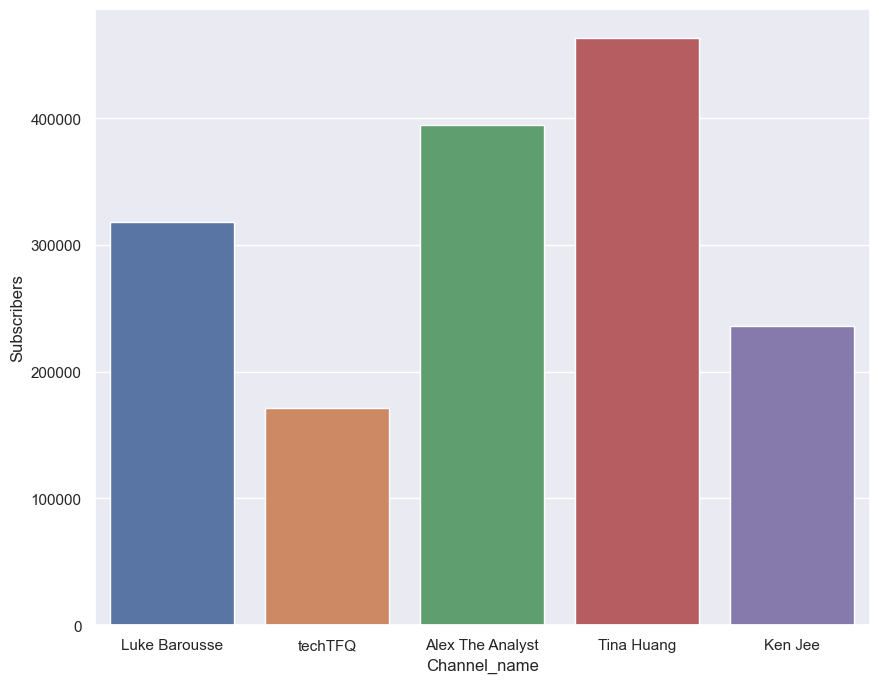

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

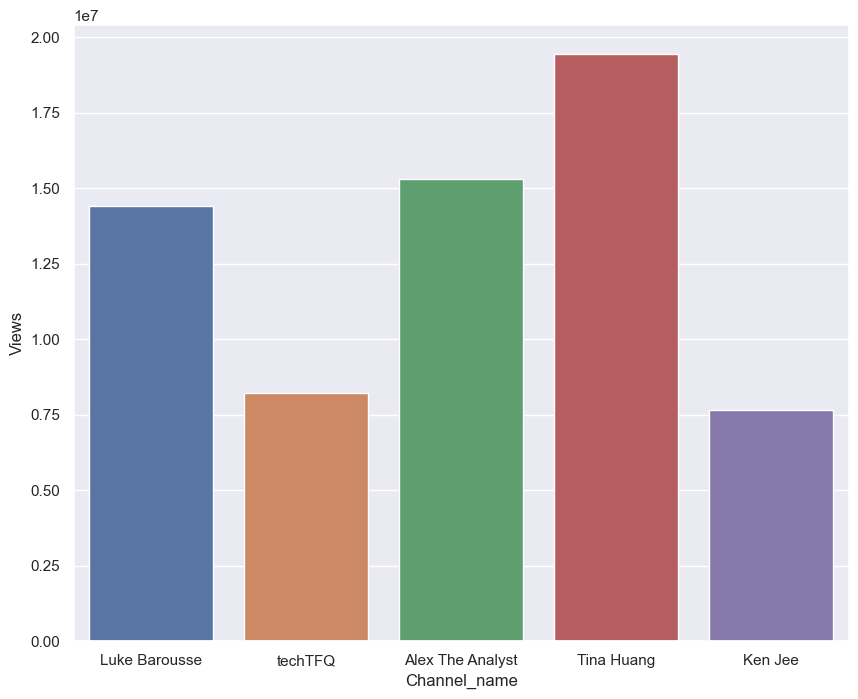

In [11]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

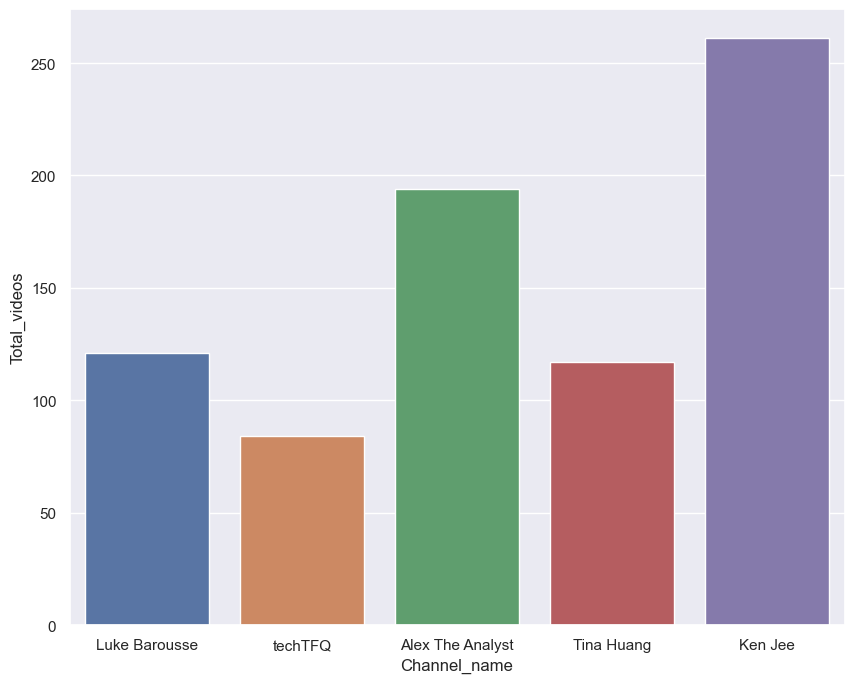

In [12]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

## Function to get video ids

In [13]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Luke Barousse,318000,14416758,121,UULLw7jmFsvfIVaUFsLs8mlQ
1,techTFQ,171000,8216556,84,UUnz-ZXXER4jOvuED5trXfEA
2,Alex The Analyst,395000,15293229,194,UU7cs8q-gJRlGwj4A8OmCmXg
3,Tina Huang,463000,19433166,117,UU2UXDak6o7rBm23k3Vv5dww
4,Ken Jee,236000,7637231,261,UUiT9RITQ9PW6BhXK0y2jaeg


In [14]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [15]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [16]:
video_ids = get_video_ids(youtube, playlist_id)

In [17]:
video_ids

['3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CMYom00',
 'KEeUR8UDy-s',
 '0jTtHYie3CU',
 '2RWwN5ZT4tA',
 'rEWPqw6rMGI',
 'o-wsyxWbPOw',
 'xpIFS6jZbe8',
 '-zbLpoJVBMI',
 'scSc6YSanQ0',
 'FqNpDNmpcEo',
 'vwvdtXMcNzI',
 '2qVWurPFwfc',
 '35g8fCi-kbw',
 'n6MiRgxN5iA',
 'ammCGdzSoag',
 '15c7WD-lKUY',
 'TjGFBQC27ng',
 'qUK5Vk4NvBw',
 'cnqTU6eJwH0',
 'k8YxyrcAXJs',
 'VvnOXDCVm8k',
 '68GGPK3WaqI',
 'S4Lei5mOppc',
 'tG_UW_p0UqE',
 '143WWA5Sy9k',
 's1gD35

## Function to get video details

In [18]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Dislikes = video['statistics']['dislikeCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [19]:
video_details = get_video_details(youtube, video_ids)

KeyError: 'dislikeCount'

In [ ]:
video_data = pd.DataFrame(video_details)

In [ ]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Dislikes'] = pd.to_numeric(video_data['Dislikes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,#66DaysOfData Round 3 Live Event! (feat. @Stat...,2021-10-12,1222,108,0,3
1,My First Data Science Project (What Really Hap...,2021-10-08,2123,154,0,56
2,Is Data Visualization Important for Data Scien...,2021-08-20,9180,444,1,115
3,Project Presentation - Expectations vs. Realit...,2021-08-07,4421,162,2,36
4,Data Science Project - Expectations vs Reality...,2021-08-06,5474,198,5,18
...,...,...,...,...,...,...
202,How to Simulate NBA Games in Python,2018-11-19,12818,293,1,48
203,Should You Get A Masters in Data Science?,2018-11-14,17273,263,9,136
204,How I Became A Data Scientist From a Business ...,2018-11-12,5203,156,3,23
205,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,6277,144,2,17


In [ ]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [ ]:
top10_videos

,Title,Published_date,Views,Likes,Dislikes,Comments
109,How I Would Learn Data Science (If I Had to St...,2020-05-08,1149174,41875,784,1865
130,The Best Free Data Science Courses Nobody is T...,2020-03-09,277707,17798,63,602
136,3 Proven Data Science Projects for Beginners (...,2020-02-17,209087,12883,50,462
85,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,142278,3752,42,342
175,The Projects You Should Do To Get A Data Scien...,2019-07-30,126146,4941,78,249
37,How I Would Learn Data Science in 2021 (What H...,2020-12-19,114565,5440,54,503
22,Why You Probably Won't Become a Data Scientist,2021-04-09,97938,2873,111,464
30,Why I Quit Data Science,2021-02-12,94986,2159,148,346
122,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,90809,2924,18,147
153,3 Reasons You Should NOT Become a Data Scientist,2019-12-16,89363,2661,79,206


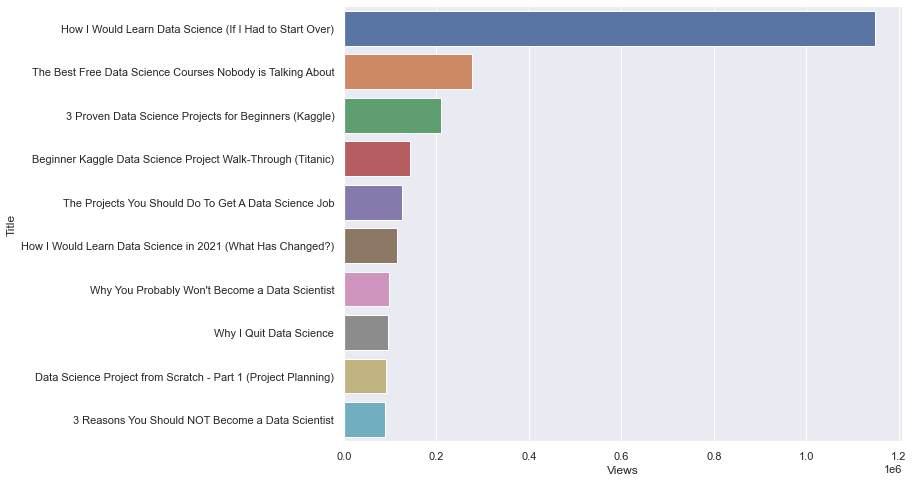

In [ ]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [ ]:
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,#66DaysOfData Round 3 Live Event! (feat. @Stat...,2021-10-12,1222,108,0,3
1,My First Data Science Project (What Really Hap...,2021-10-08,2123,154,0,56
2,Is Data Visualization Important for Data Scien...,2021-08-20,9180,444,1,115
3,Project Presentation - Expectations vs. Realit...,2021-08-07,4421,162,2,36
4,Data Science Project - Expectations vs Reality...,2021-08-06,5474,198,5,18
...,...,...,...,...,...,...
202,How to Simulate NBA Games in Python,2018-11-19,12818,293,1,48
203,Should You Get A Masters in Data Science?,2018-11-14,17273,263,9,136
204,How I Became A Data Scientist From a Business ...,2018-11-12,5203,156,3,23
205,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,6277,144,2,17


In [ ]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [ ]:
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments,Month
0,#66DaysOfData Round 3 Live Event! (feat. @Stat...,2021-10-12,1222,108,0,3,Oct
1,My First Data Science Project (What Really Hap...,2021-10-08,2123,154,0,56,Oct
2,Is Data Visualization Important for Data Scien...,2021-08-20,9180,444,1,115,Aug
3,Project Presentation - Expectations vs. Realit...,2021-08-07,4421,162,2,36,Aug
4,Data Science Project - Expectations vs Reality...,2021-08-06,5474,198,5,18,Aug
...,...,...,...,...,...,...,...
202,How to Simulate NBA Games in Python,2018-11-19,12818,293,1,48,Nov
203,Should You Get A Masters in Data Science?,2018-11-14,17273,263,9,136,Nov
204,How I Became A Data Scientist From a Business ...,2018-11-12,5203,156,3,23,Nov
205,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,6277,144,2,17,Jul


In [ ]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [ ]:
videos_per_month

,Month,size
0,Apr,19
1,Aug,21
2,Dec,15
3,Feb,13
4,Jan,14
5,Jul,24
6,Jun,17
7,Mar,20
8,May,19
9,Nov,15


In [ ]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [ ]:
videos_per_month = videos_per_month.sort_index()

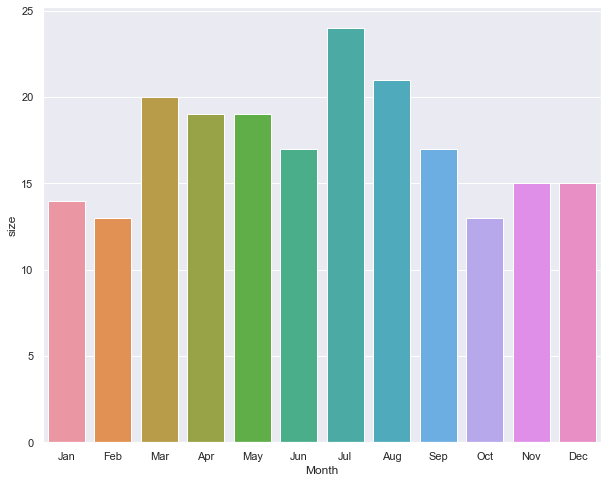

In [ ]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)